# Linked Lists

In [1]:
from pathlib import Path

In [2]:
p = Path('/Users/olli/Desktop/PythonNotebooks')
sub_dir = 'pics'
pics = p/sub_dir
pics

WindowsPath('/Users/olli/Desktop/PythonNotebooks/pics')

## Singly Linked Lists

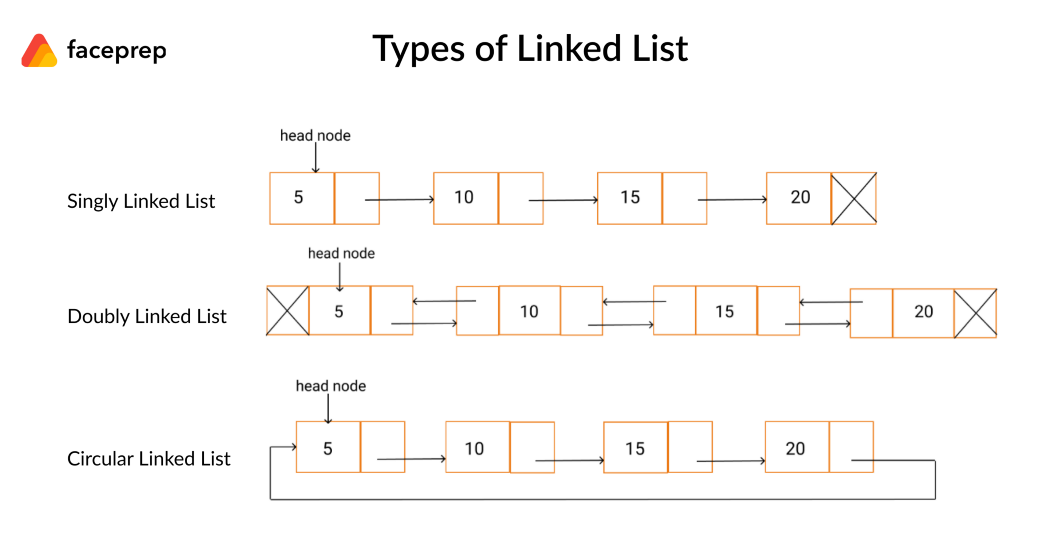

In [3]:
from IPython.display import Image
filename = 'linked-lists.png'
Image(pics/filename)

**Linked lists** have: 
* a head
* a tail - the node with None as its next reference

Traversing the list is referred to as link hopping or pointer hopping 

### Important properties 

* Linked lists do not have predetermined fixed size 
* Space complexity is proportional to the current number of elements
* Doubly linked lists allow for easier deletion of the last node

#### Inserting a new element into a linked list 

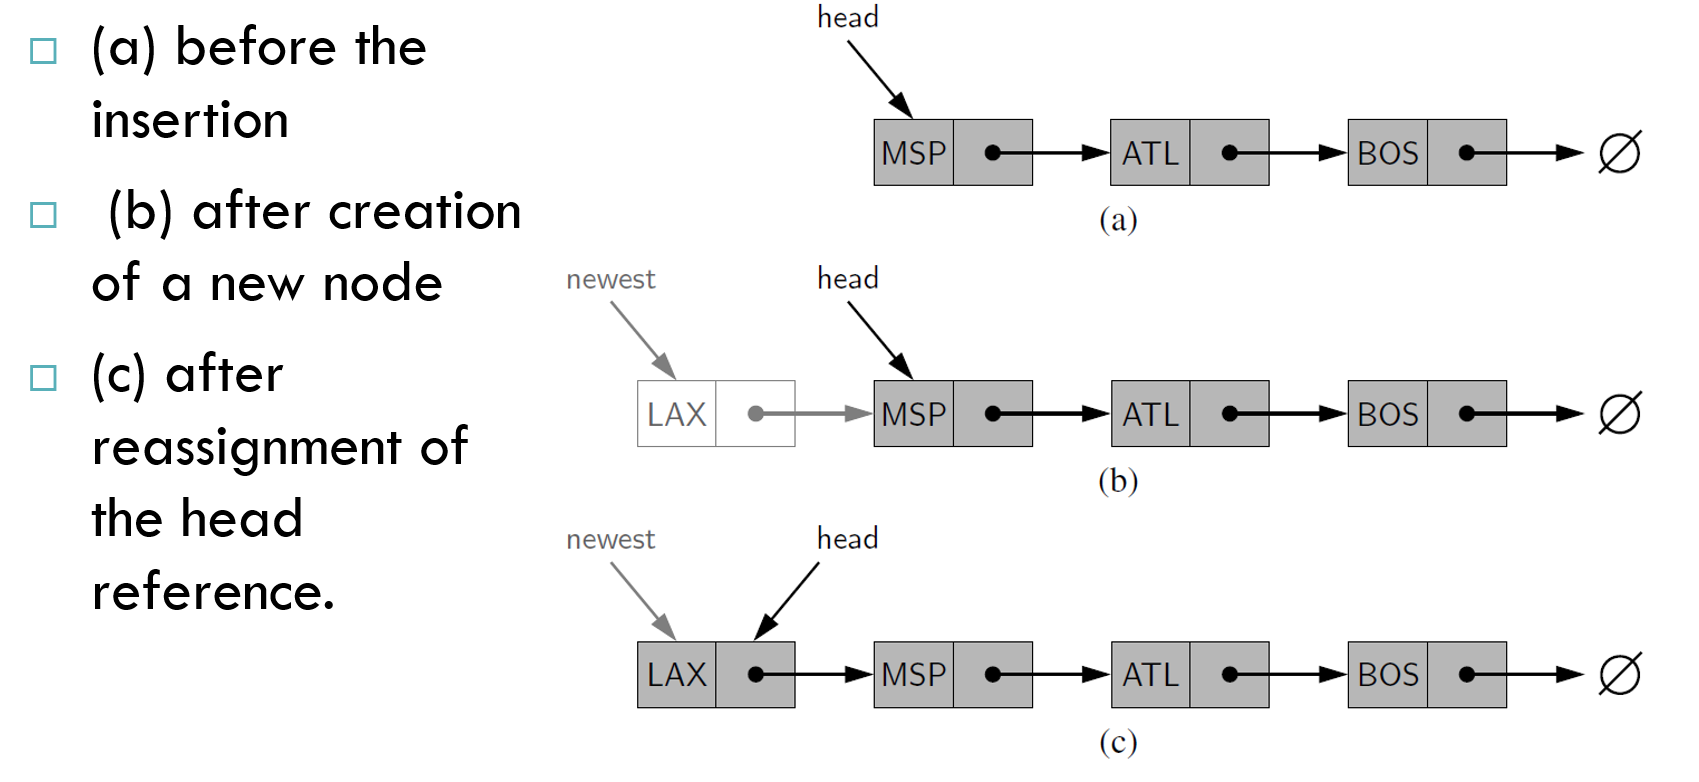

In [4]:
from IPython.display import Image
filename = 'll-insert.png'
Image(pics/filename)

#### Inserting a new element into a linked list at the tail

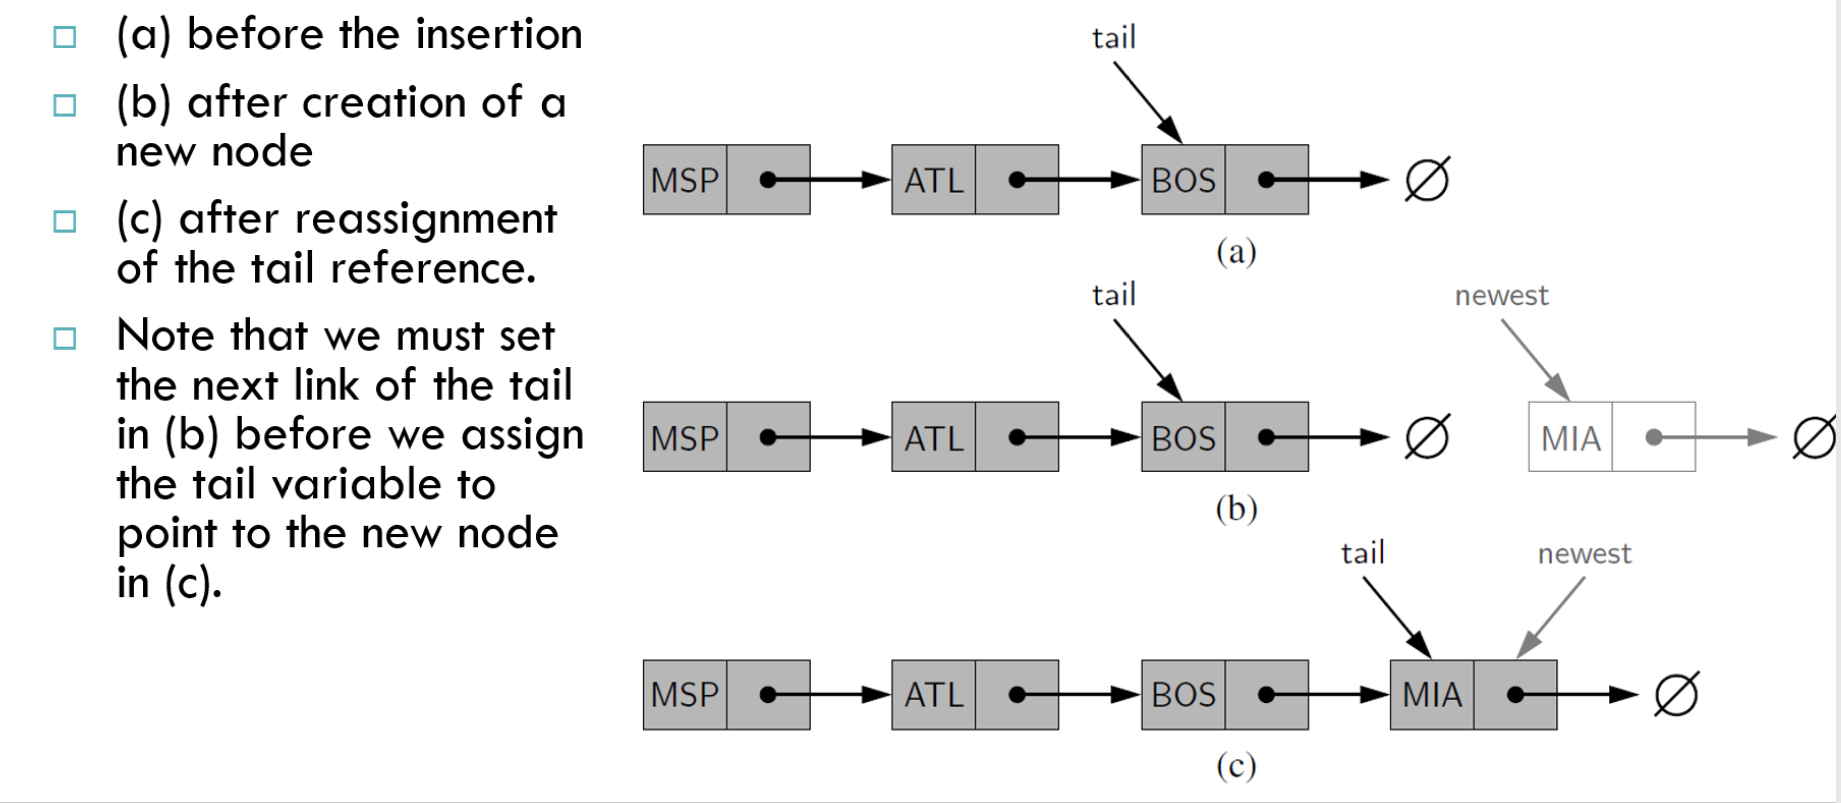

In [5]:
from IPython.display import Image
filename = 'll-insert-tail.png'
Image(pics/filename)

# Singly Linked List Implementation

In this lecture we will implement a basic Singly Linked List.

Remember, in a singly linked list, we have an ordered list of items as individual Nodes that have pointers to other Nodes.

In [6]:
class Node(object):
    
    def __init__(self,value):
        
        self.value = value
        self.nextnode = None

Now we can build out Linked List with the collection of nodes:

In [7]:
a = Node(1)
b = Node(2)
c = Node(3)

In [8]:
a.nextnode = b

In [9]:
b.nextnode = c

In [10]:
a.nextnode.nextnode.value

3

In [11]:
# insert a node as the new head 
u = Node(0)

u.nextnode = a

In [12]:
u.nextnode.value

1

In [13]:
u.nextnode.nextnode.nextnode.value

3

In a Linked List the first node is called the **head** and the last node is called the **tail**. Let's discuss the pros and cons of Linked Lists:

## Pros

* Linked Lists have **constant-time insertions** and deletions in any position, in comparison, arrays require O(n) time to do the same thing.

* Linked lists can continue to expand without having to specify their size ahead of time (remember our lectures on Array sizing form the Array Sequence section of the course!)

## Cons

* To access an element in a linked list, you need to take **O(k)** time to go from the head of the list to the kth element. In contrast, arrays have **constant time operations** to access elements in an array.

## Doubly Linked Lists

* Each node has a reference to the node before and after it
* They allow for a greater number of constant time operations 
* There are dummy nodes called the header and trailer nodes are known as sentinels 

#### Inserting a node 

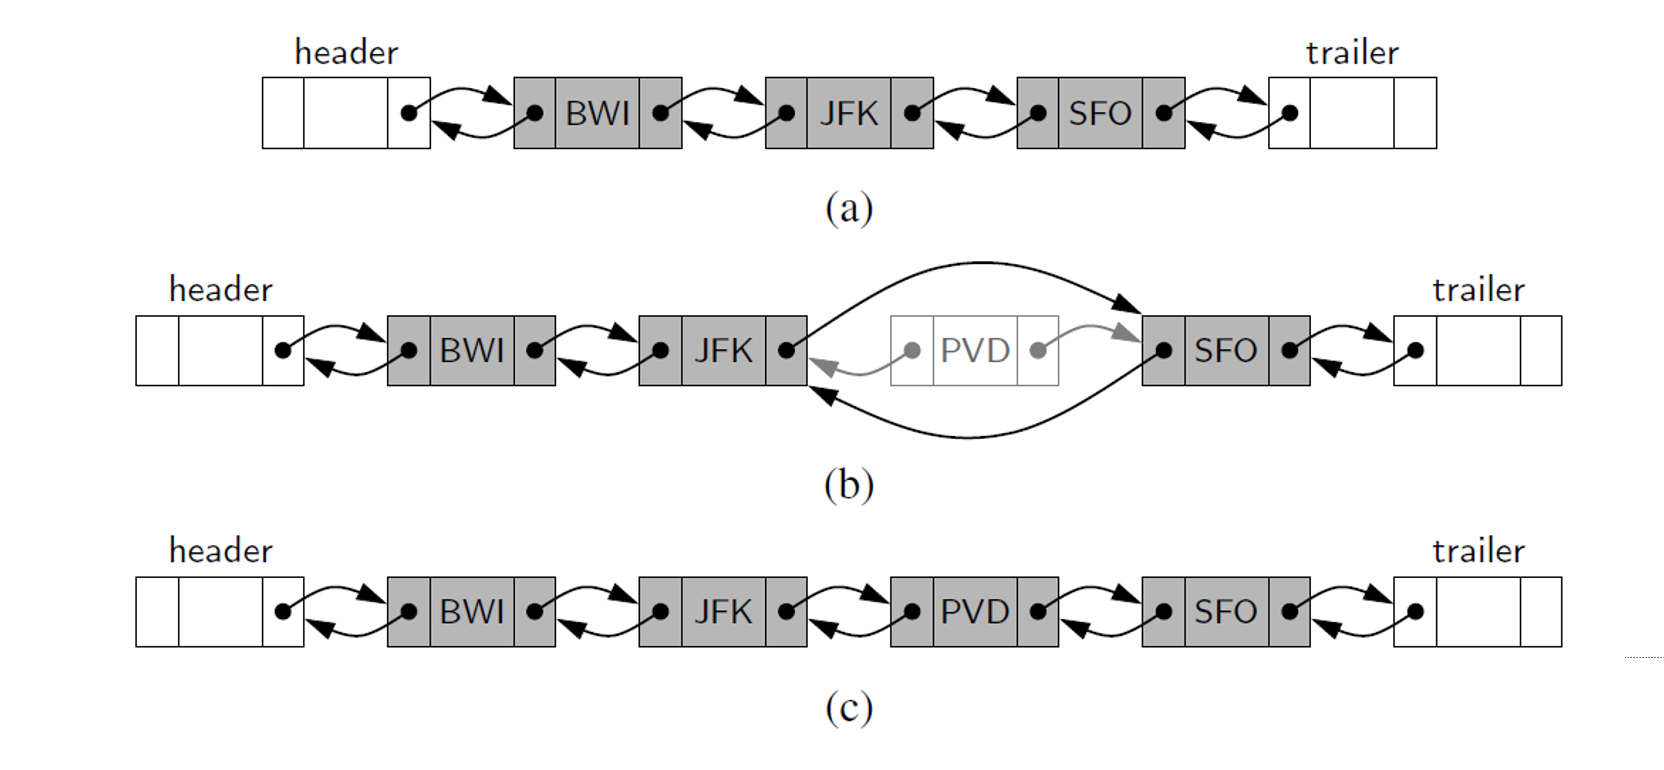

In [14]:
from IPython.display import Image
filename = 'dl-insert.png'
Image(pics/filename)

# Doubly Linked List Implementation

In this lecture we will implement a Doubly Linked List 

In [15]:
class DoublyLinkedListNode(object):
    
    def __init__(self,value):
        
        self.value = value
        self.next_node = None
        self.prev_node = None

Now that we have our node that can reference next *and* previous values, let's begin to build out our linked list!

In [16]:
a = DoublyLinkedListNode(1)
b = DoublyLinkedListNode(2)
c = DoublyLinkedListNode(3)

In [17]:
# Setting b after a
b.prev_node = a
a.next_node = b

In [18]:
# Setting c after b
b.next_node = c
c.prev_node = b

In [19]:
# a circular list would mean you reference a after c
c.next_node = a 

In [20]:
# circular list value
c.next_node.value

1

In [21]:
# inserting a new node 

u = DoublyLinkedListNode(2.5)

b.next_node = u 
c.prev_node = u

u.next_node = c
u.prev_node = b

In [22]:
b.next_node.value

2.5

In [23]:
c.prev_node.value

2.5

Having a Doubly Linked list allows us to go though our Linked List forwards **and** backwards.

# Interview Problems

---

# Singly Linked List Cycle Check - SOLUTION

## Problem

Given a singly linked list, write a function which takes in the first node in a singly linked list and returns a boolean indicating if the linked list contains a "cycle".

A cycle is when a node's next point actually points back to a previous node in the list. This is also sometimes known as a circularly linked list.

You've been given the Linked List Node class code:

In [24]:
class Node(object):
    
    def __init__(self,value):
        
        self.value = value
        self.nextnode = None

## Solution

To solve this problem we will have two markers traversing through the list. **marker1** and **marker2**. We will have both makers begin at the first node of the list and traverse through the linked list. However the second marker, marker2, will move two nodes ahead for every one node that marker1 moves.

By this logic we can imagine that the markers are "racing" through the linked list, with marker2 moving faster. If the linked list has a cycle and is circularly connected we will have the analogy of a track, in this case the marker2 will eventually be "lapping" the marker1 and they will equal each other. 

If the linked list has no cycle, then marker2 should be able to continue on until the very end, never equaling the first marker.

Let's see this logic coded out:

In [25]:
def cycle_check(node):

    # Begin both markers at the first node
    # quick assign two variables to same memory object
    marker1 = marker2 = node
    
    # waste of lines
#     marker1 = node
#     marker2 = node

    # Go until end of list
    while marker2 != None and marker2.nextnode != None:
        
        # Note
        marker1 = marker1.nextnode
        # this is why you have the check to see if marker2.nextnode != None
        # if you omit this check you will get an error for trying to access an attribute of None         
        marker2 = marker2.nextnode.nextnode

        # Check if the markers have matched
        if marker2 == marker1: return True

    # Case where the faster marker reaches the end of the list
    return False

# Test Your Solution

In [26]:
"""
RUN THIS CELL TO TEST YOUR SOLUTION
"""
from nose.tools import assert_equal

# CREATE CYCLE LIST
a = Node(1)
b = Node(2)
c = Node(3)

a.nextnode = b
b.nextnode = c
c.nextnode = a # Cycle Here!


# CREATE NON CYCLE LIST
x = Node(1)
y = Node(2)
z = Node(3)

x.nextnode = y
y.nextnode = z


#############
class TestCycleCheck(object):
    
    def test(self,sol):
        assert_equal(sol(a),True)
        assert_equal(sol(x),False)
        
        print("ALL TEST CASES PASSED")
        
# Run Tests

t = TestCycleCheck()
t.test(cycle_check)


ALL TEST CASES PASSED


___
# Linked List Reversal - SOLUTION

## Problem

Write a function to reverse a Linked List in place. The function will take in the head of the list as input and return the new head of the list.

You are given the example Linked List Node class:

In [27]:
class Node(object):
    
    def __init__(self,value):       
        self.value = value
        self.nextnode = None
        
    def __repr__(self):
        return f'Node \n value : {self.value}'

# Solution

Since we want to do this in place we want to make the function operate in **O(1) space**, meaning we don't want to create a new list, so we will simply use the current nodes! Time wise, we can perform the reversal in O(n) time.

We can reverse the list by changing the next pointer of each node. Each node's next pointer should point to the previous node.

In one pass from head to tail of our input list, we will point each node's next pointer to the previous element.

Make sure to copy current.next_node into next_node **before** setting current.next_node to previous. Let's see this solution coded out:

In [28]:
def reverse(head):
    # Set up current,previous, and next nodes
    current = head
    previous = None
    nextnode = None

    # until we have gone through to the end of the list
    while current:
        # Make sure to copy the current nodes next node to a variable next_node
        # Before overwriting as the previous node for reversal
        nextnode = current.nextnode

        # Reverse the pointer ot the next_node
        current.nextnode = previous

        # Go one forward in the list
        previous = current
        current = nextnode

    return previous

# Test Your Solution

You should be able to easily test your own solution to make sure it works. Given the short list a,b,c,d with values 1,2,3,4. Check the effect of your reverse function and maek sure the results match the logic here below:

In [29]:
# Create a list of 4 nodes
a = Node(1)
b = Node(2)
c = Node(3)
d = Node(4)

# Set up order a,b,c,d with values 1,2,3,4
a.nextnode = b
b.nextnode = c
c.nextnode = d

Now let's check the values of the nodes coming after a, b and c:

In [30]:
print(a.nextnode.value)
print(b.nextnode.value)
print(c.nextnode.value)

2
3
4


In [31]:
d.nextnode.value

AttributeError: 'NoneType' object has no attribute 'value'

So far so good. Note how there is no value proceeding the last node, this makes sense! Now let's reverse the linked list, we should see the opposite order of values!

In [32]:
# will return the new head of the list -> Node d
reverse(a)

Node 
 value : 4

In [33]:
print(d.nextnode.value)
print(c.nextnode.value)
print(b.nextnode.value)

3
2
1


In [34]:
print(a.nextnode.value) # This will give an error since it now points to None

AttributeError: 'NoneType' object has no attribute 'value'

Great, now we can see that each of the values points to its previous value (although now that the linked list is reversed we can see the ordering has also reversed)

___
# Linked List Nth to Last Node - SOLUTION

## Problem Statement
Write a function that takes a head node and an integer value **n** and then returns the nth to last node in the linked list. For example, given:

In [35]:
class Node:

    def __init__(self, value):
        self.value = value
        self.nextnode  = None

## Solution

One approach to this problem is this:

Imagine you have a bunch of nodes and a "block" which is n-nodes wide. We could walk this "block" all the way down the list, and once the front of the block reached the end, then the other end of the block would be a the Nth node!  

So to implement this "block" we would just have two pointers a left and right pair of pointers. Let's mark out the steps we will need to take:

* Walk one pointer **n** nodes from the head, this will be the right_point
* Put the other pointer at the head, this will be the left_point
* Walk/traverse the block (both pointers) towards the tail, one node at a time, keeping a distance **n** between them.
* Once the right_point has hit the tail, we know that the left point is at the target.

Let's see the code for this!

In [36]:
def nth_to_last_node(n, head):

    left_pointer  = head
    right_pointer = head

    # Set right pointer at n nodes away from head
    for i in range(n-1):
        # Check for edge case of not having enough nodes!
        if not right_pointer.nextnode:
            raise LookupError('Error: n is larger than the linked list.')
        # Otherwise, we can set the block
        right_pointer = right_pointer.nextnode

    # Move the block down the linked list
    # you need to stop when you reach the last node
    while right_pointer.nextnode:
        left_pointer  = left_pointer.nextnode
        right_pointer = right_pointer.nextnode

    # Now return left pointer, its at the nth to last element!
    return left_pointer

In [37]:
a = Node(1)
b = Node(2)
c = Node(3)
d = Node(4)
e = Node(5)

a.nextnode = b
b.nextnode = c
c.nextnode = d
d.nextnode = e

# find the 3rd last node in the singly linked list
nth_to_last_node(3,a).value

3

# Test Your Solution

In [38]:
"""
RUN THIS CELL TO TEST YOUR SOLUTION AGAINST A TEST CASE 

PLEASE NOTE THIS IS JUST ONE CASE
"""

from nose.tools import assert_equal

a = Node(1)
b = Node(2)
c = Node(3)
d = Node(4)
e = Node(5)

a.nextnode = b
b.nextnode = c
c.nextnode = d
d.nextnode = e

####

class TestNLast(object):
    
    def test(self,sol):
        
        assert_equal(sol(3,a),c)
        print('ALL TEST CASES PASSED')
        
# Run tests
t = TestNLast()
t.test(nth_to_last_node)

ALL TEST CASES PASSED
